In [1]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import math

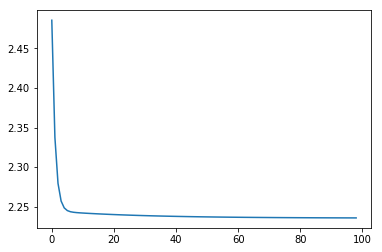

 Q.1 - 1st Order Polynomial Regression, Optimized Weights are - [[ 0.43434994  0.03295014]]
 Q.1 - 1st Order Polynomial Regression, RMSE is - 2.2359787375118474


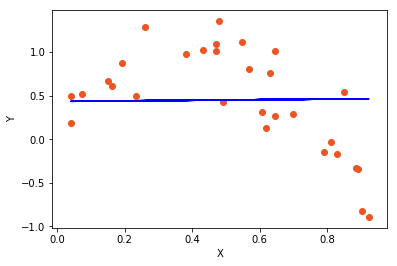

In [2]:
# Q.1 - 1st Order Polynomial Regression

# Reading and plotting data
data = pd.read_csv('ex2data1.csv', sep=",", encoding='utf-8', header='infer')

def get_rmse(x, y, beta):
    m = len(x)
    inner = np.power(((x * beta.T) - y), 2)
    return math.sqrt(np.sum(inner) / (2 * m))

def gradientDescentUsingMatrix(x, y, beta, learning_rate, iters):  
    temp = np.matrix(np.zeros(beta.shape))
    parameters = int(beta.ravel().shape[1])
    cost = np.zeros(iters)
    old_cost = sys.maxsize
    new_cost = sys.maxsize
    cost_history = []
    for i in range(iters):
        error = (x * beta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = beta[0,j] - ((learning_rate / len(x)) * np.sum(term))
            
        beta = temp
        old_cost = new_cost
        new_cost = get_rmse(x, y, beta)
        if(abs(old_cost - new_cost) < 0.00001):
            #print("breaking" + str(old_cost) + str(new_cost))
            break;
        #print ("cost : " + str(new_cost))
        cost[i] = str(new_cost)
        cost_history.append(new_cost)
    #plt.plot(cost_history)
    #plt.show()
    return beta, cost, new_cost

data.insert(0,-1,1) # inserting ones column for beta0
df1 = data[[-1,'x']]
df2 = data['y']
X =  np.matrix(df1.values)
Y =  np.matrix(df2.values)
beta = np.matrix(np.zeros(X.shape[1]))

beta, costs, rmse = gradientDescentUsingMatrix(X, Y, beta, 0.01, 10000)
y_pred = X * beta.T # First Order

print(" Q.1 - 1st Order Polynomial Regression, Optimized Weights are -", beta)
print(" Q.1 - 1st Order Polynomial Regression, RMSE is - " + str(rmse))

plt.scatter(data['x'], data['y'], c='#ef5423')
plt.ylabel('Y');
plt.xlabel('X');



plt.plot(data['x'], y_pred, c='blue',)
